In [15]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import pandas as pd
import numpy as np
import networkx as nx
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv("bread basket.csv")

In [16]:
data.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [17]:
data.shape

(20507, 5)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [19]:
data.describe()

,Transaction
count,20507.000000
mean,4976.202370
std,2796.203001
min,1.000000
25%,2552.000000
50%,5137.000000
75%,7357.000000
max,9684.000000


In [20]:
data.isnull().sum()

Transaction        0
Item               0
date_time          0
period_day         0
weekday_weekend    0
dtype: int64

In [21]:
data['Transaction'].nunique()

9465

In [22]:
data['date_time']=pd.to_datetime(data['date_time'])
data['date']=data['date_time'].dt.date
data['time']=data['date_time'].dt.time
data['month']=data['date_time'].dt.month

C:\Users\YOGA\AppData\Local\Temp\ipykernel_3492\2271635049.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['date_time']=pd.to_datetime(data['date_time'])


In [23]:
data['month'] = data['month'].replace((1,2,3,4,5,6,7,8,9,10,11,12),
                                          ('January','February','March','April','May','June','July','August',
                                          'September','October','November','December'))
data['day']=data['date_time'].dt.weekday
data['day'] = data['day'].replace((0,1,2,3,4,5,6),
                                          ('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'))
data['hour']=data['date_time'].dt.hour
data.drop('date_time', axis = 1, inplace = True)
data.head()

,Transaction,Item,period_day,weekday_weekend,date,time,month,day,hour
0,1,Bread,morning,weekend,2016-10-30,09:58:00,October,Sunday,9
1,2,Scandinavian,morning,weekend,2016-10-30,10:05:00,October,Sunday,10
2,2,Scandinavian,morning,weekend,2016-10-30,10:05:00,October,Sunday,10
3,3,Hot chocolate,morning,weekend,2016-10-30,10:07:00,October,Sunday,10
4,3,Jam,morning,weekend,2016-10-30,10:07:00,October,Sunday,10


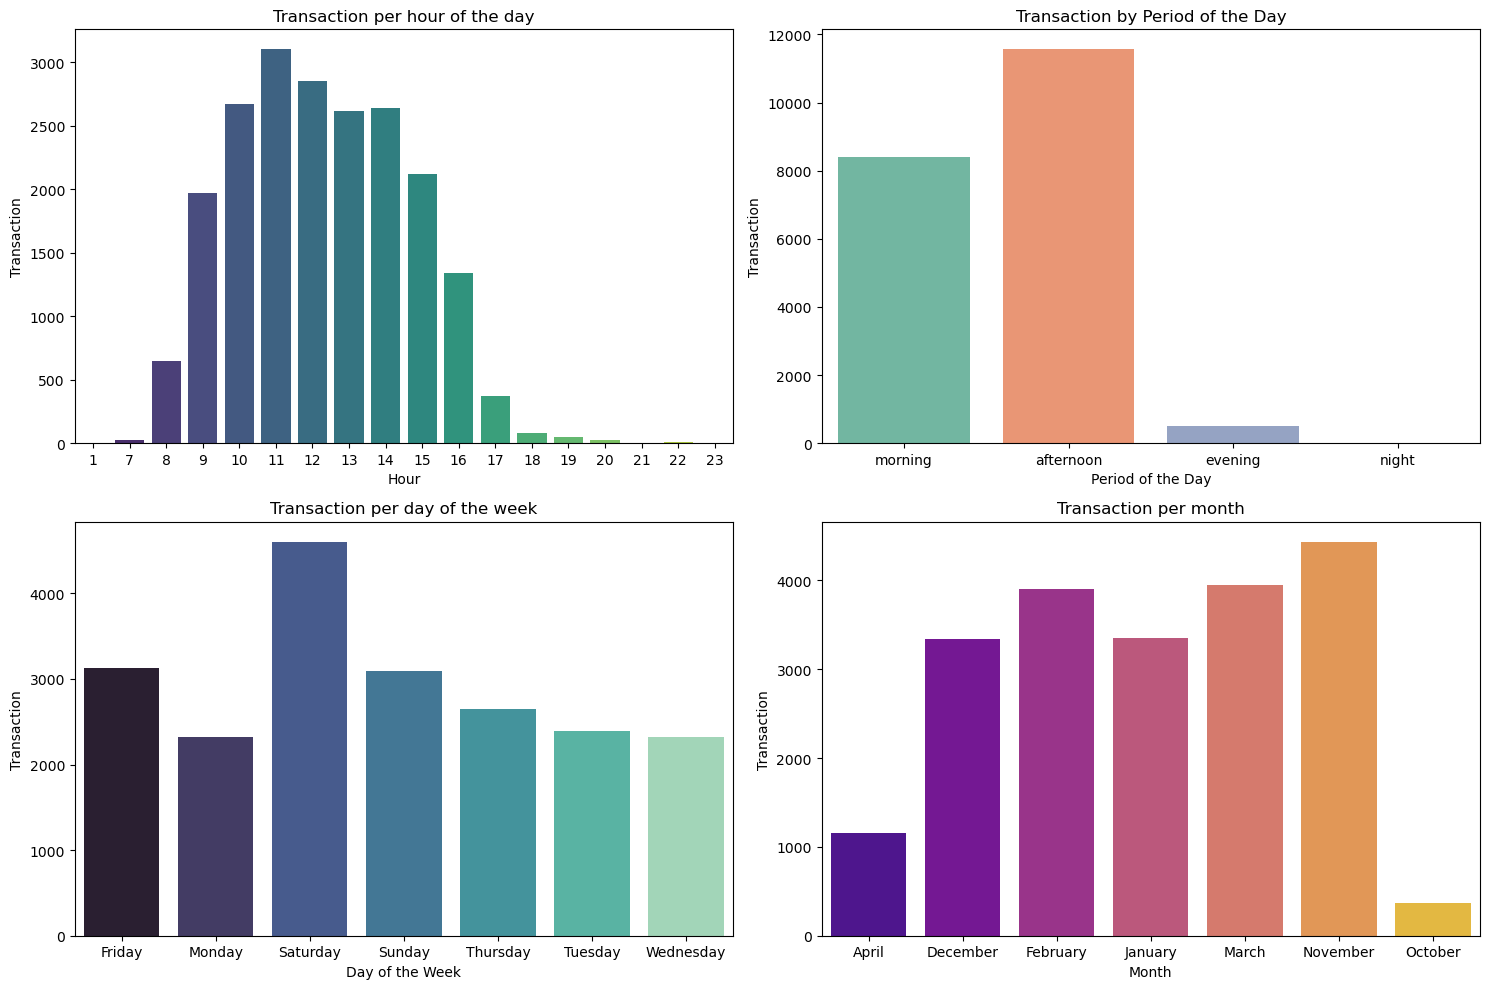

In [24]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Transaction per hour of the day
coutbyhour = data.groupby('hour')['Transaction'].count().reset_index()
coutbyhour.sort_values('hour', inplace=True)
sns.barplot(x=coutbyhour['hour'], y=coutbyhour['Transaction'], ax=axs[0, 0], palette='viridis')
axs[0, 0].set(xlabel='Hour', ylabel='Transaction', title='Transaction per hour of the day')

# Plot 2: Transaction by period of the day
coutbyweekday = data['period_day'].value_counts().reindex(['morning', 'afternoon', 'evening', 'night'])
sns.barplot(x=coutbyweekday.index, y=coutbyweekday.values, ax=axs[0, 1], palette='Set2')
axs[0, 1].set(xlabel='Period of the Day', ylabel='Transaction', title='Transaction by Period of the Day')

# Plot 3: Transaction per day of the week
coutbydayp = data.groupby('day')['Transaction'].count().reset_index()
coutbydayp.sort_values('day', inplace=True)
sns.barplot(x=coutbydayp['day'], y=coutbydayp['Transaction'], ax=axs[1, 0], palette='mako')
axs[1, 0].set(xlabel='Day of the Week', ylabel='Transaction', title='Transaction per day of the week')

# Plot 4: Transaction per month
coutbymonth = data.groupby('month')['Transaction'].count().reset_index()
coutbymonth.sort_values('month', inplace=True)
sns.barplot(x=coutbymonth['month'], y=coutbymonth['Transaction'], ax=axs[1, 1], palette='plasma')
axs[1, 1].set(xlabel='Month', ylabel='Transaction', title='Transaction per month')

# Adjust layout
plt.tight_layout()
plt.show()

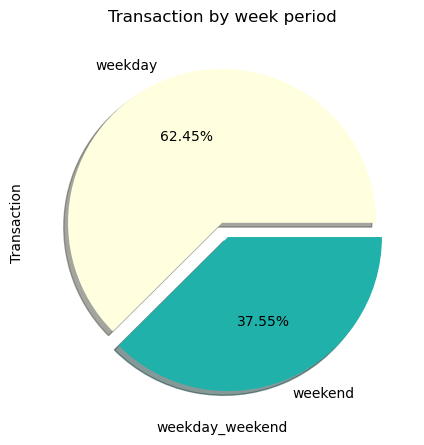

In [25]:
import matplotlib.pyplot as plt

size = [12807, 7700]
labels = "weekday", "weekend"
colors = ["lightyellow", "lightseagreen"]  # Different color scheme
explode = [0, 0.1]

plt.figure(figsize=(12, 5))
plt.pie(size, labels=labels, colors=colors, explode=explode, shadow=True, autopct="%.2f%%")
plt.xlabel('weekday_weekend')
plt.ylabel('Transaction')
plt.title('Transaction by week period')
plt.show()

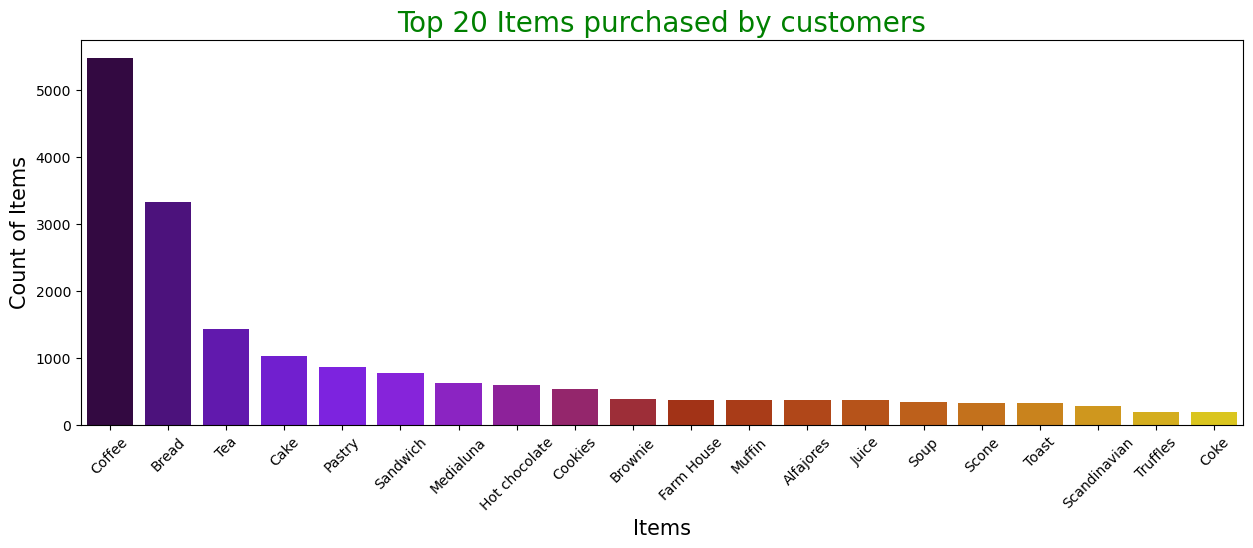

In [26]:
plt.figure(figsize=(15,5))
sns.barplot(x = data.Item.value_counts().head(20).index, y = data.Item.value_counts().head(20).values, palette = 'gnuplot')
plt.xlabel('Items', size = 15)
plt.xticks(rotation=45)
plt.ylabel('Count of Items', size = 15)
plt.title('Top 20 Items purchased by customers', color = 'green', size = 20)
plt.show()

In [27]:
from mlxtend.frequent_patterns import association_rules, apriori
transactions = data.groupby(['Transaction', 'Item'])['Item'].count().reset_index(name ='Count')
transactions

,Transaction,Item,Count
0,1,Bread,1
1,2,Scandinavian,2
2,3,Cookies,1
3,3,Hot chocolate,1
4,3,Jam,1
...,...,...,...
18882,9682,Tacos/Fajita,1
18883,9682,Tea,1
18884,9683,Coffee,1
18885,9683,Pastry,1


In [28]:
table = transactions.pivot_table(index='Transaction', columns='Item', values='Count', aggfunc='sum').fillna(0)
table.head()

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
# making a function which returns 0 or 1
# 0 means item was not in that transaction, 1 means item present in that transaction
def hot_encode(x):
    if(x==0):
        return 0
    if(x>0):
        return 1

In [30]:
# applying the function to the dataset
final_table=table.applymap(hot_encode)
final_table.head()

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
# frequent itemset
frequence = apriori(final_table, min_support=0.015, use_colnames=True)
rules = association_rules(frequence, metric="lift", min_threshold=1)

C:\Users\YOGA\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [32]:
# now making the rules from frequent itemset generated above
rules.sort_values('confidence', ascending = False, inplace=True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
26,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582,0.332006
16,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871,0.170091
20,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,0.146161
0,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648,0.119574
15,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919,0.108738
22,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384,0.109205
6,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
24,(Scone),(Coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366,0.088224
10,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174,0.081700
12,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553,0.060403


In [33]:
# arranging the data from highest to lowest with respect to 'confidence'
rules.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
26,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582,0.332006
16,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871,0.170091
20,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,0.146161
0,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648,0.119574
15,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919,0.108738
22,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384,0.109205
6,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
24,(Scone),(Coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366,0.088224
10,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174,0.081700
12,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553,0.060403
